In [1]:
import os
os.chdir("/Users/ieo5776/Desktop/signal_processing_course/")
import numpy as np
import matplotlib.pyplot as plt
from tools import functions
import copy
import scipy.io

# Denoising data

Here i'll try to denoised the target data channel that's been provided.  
I have coded all major methods of **denoising** learned in this chapter and stored them in `tools`.

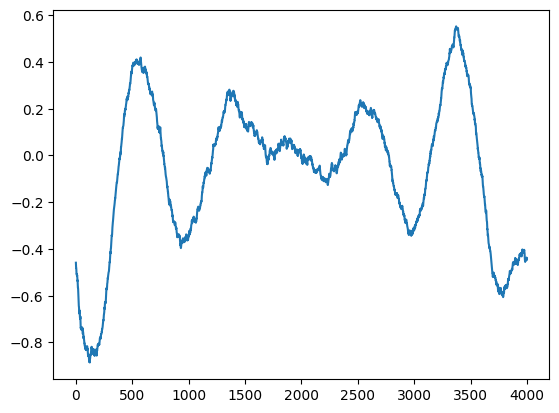

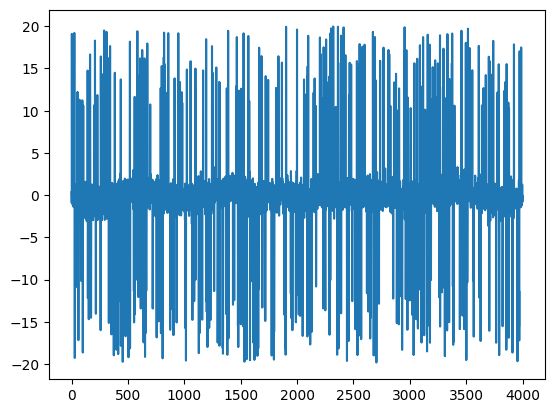

In [2]:
# Load signal
mat = scipy.io.loadmat("SignalProcessing/TimeSeriesDenoising/denoising_codeChallenge.mat")

#%matplotlib widget
# Show how the processed singal should look like
plt.plot(range(len(mat['cleanedSignal'][0])), mat['cleanedSignal'][0])
plt.show()
# Show the current raw signal
plt.plot(range(len(mat['origSignal'][0])), mat['origSignal'][0])
plt.show()

## First considerations
1) Matlab file doesn't contain an artifact channel/array, therefore `least-square template matching` as a denoiser doesn't really make sense.
2) The frequency at which spikes happen doesn't really seems to be contanst, either it needs to be estimated from the data with some EDA or `time synch averaging` is not appropriate.
3) I cannot really see some obvious trends, either linear or not. Therefore, i don't think this approach should work.
4) Looking at the pattern of spikes, i think the best approach would be to go with a `median_filter` or a `gaussian smoothing`. `mean smoothing` could also work but it looks too smooth to be that. 

In [3]:
# Mean smoothing
mean_smoothed = functions.mean_smoothing(k=20, 
                                         time=len(mat['origSignal'][0]), 
                                         signal=mat['origSignal'][0])


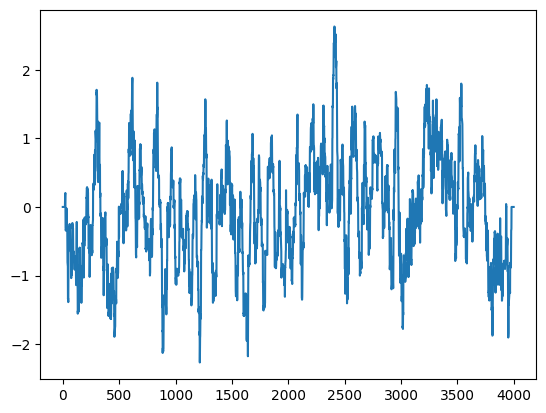

In [4]:
plt.plot(range(len(mat['origSignal'][0])), mean_smoothed)
plt.show()

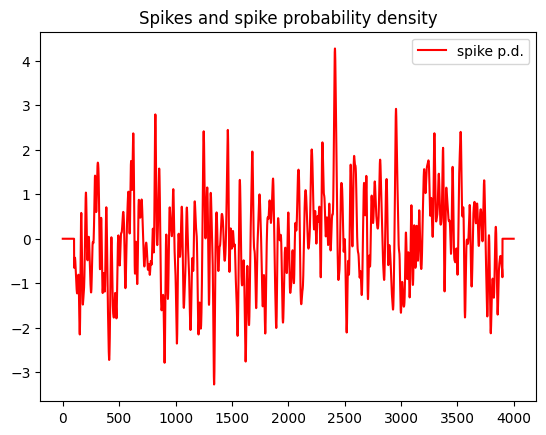

In [6]:
# Gaussian smoothing a spike data
fwhm = 15 # in points

# normalized time vector in indicies
k = 100
time = np.arange(-k,k+1) 

# create Gaussian window
gauss_window = np.exp( -(4*np.log(2)*time**2) / fwhm**2 )
gauss_window = gauss_window / np.sum(gauss_window) # normalize to energy unit

# initialize filtered signal vector 
filt_signal = np.zeros(len(mat['origSignal'][0]))

# implement the weighted running mean filter
for i in range(k+1,len(mat['origSignal'][0])-k):
    filt_signal[i] = np.sum( mat['origSignal'][0][i-k:i+k+1]*gauss_window )


# plot the filtered signal (can be interpreted as a spike probability density)
plt.plot(mat['origSignal'][0],'b',label='spikes')
plt.plot(filt_signal,'r',label='spike p.d.')
plt.legend()
plt.title('Spikes and spike probability density')
plt.show()

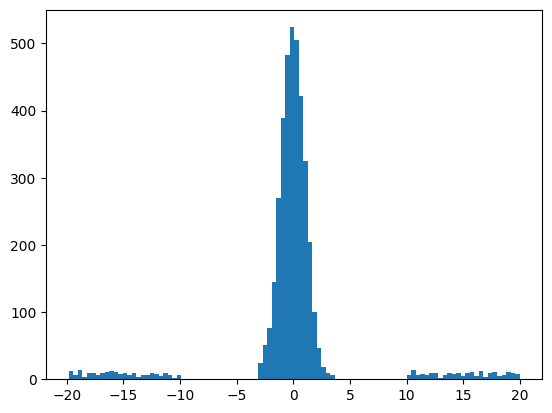

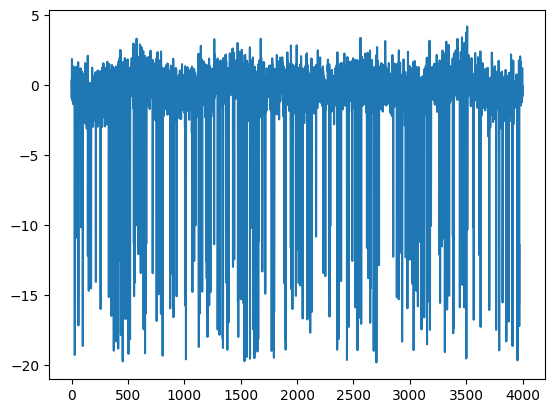

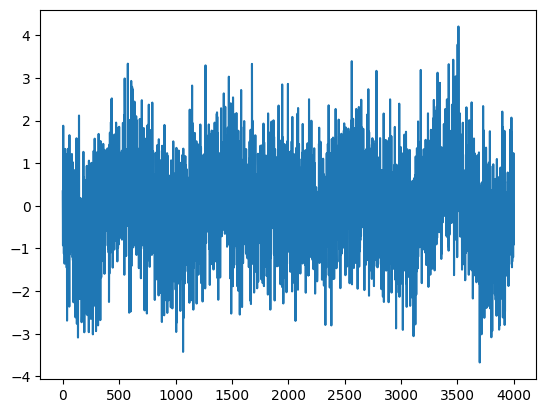

In [3]:
# median filter to remove spike noise
plt.hist(mat['origSignal'][0], 100)
plt.show()

# Seems like the spikes are either > 10 or < -10.
# I'll try to apply the same smoothing twice for both thresholds

median_filt = functions.median_filter(threshold=5, signal=mat['origSignal'][0],
                                      k=20)

plt.plot(range(len(mat['origSignal'][0])), median_filt)
plt.show()

median_filt_2 = functions.median_filter(threshold=-5, signal=median_filt,
                                      k=20, direction="negative")

plt.plot(range(len(median_filt_2)), median_filt_2)
plt.show()

This one looks better! I think i'll use it as a starting point and then apply another typo of denoising tried before. Mean smoothing does look right. Gaussian on the other end doesn't look nice.

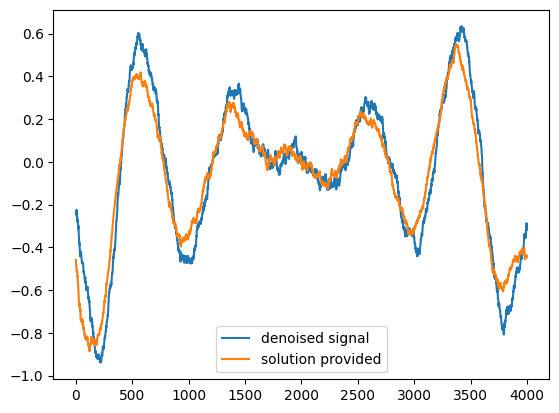

In [16]:
# Mean smoothing
median_mean_smoothed = functions.mean_smoothing(k=100, 
                                         time=len(mat['origSignal'][0]), 
                                         signal=median_filt_2)

plt.plot(range(len(mat['origSignal'][0])), median_mean_smoothed, label="denoised signal")
#plt.show()
plt.plot(range(len(mat['cleanedSignal'][0])), mat['cleanedSignal'][0], label="solution provided")
plt.legend()
plt.show()

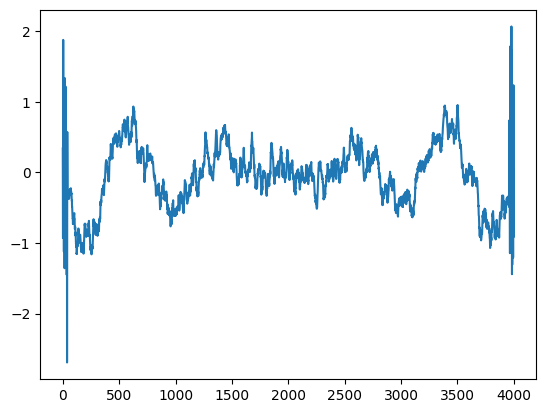

In [21]:
gaussian_mean_smoothing = functions.gaussian_smoothing(fwhm=25,
                                                       signal=median_filt_2,
                                                       time=len(median_filt_2),
                                                       srate=1000,
                                                       k=40, check_kernel=False)

plt.plot(range(len(median_filt_2)), gaussian_mean_smoothing)